In [1]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 22.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 34.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━

In [2]:
pip install bnltk

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
!pip install bnlp-toolkit==4.0.0.dev4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 13.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=78712ec52b4375d669e48f94da38fee3e05f625d2d73df0085fb66798e2f244d
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded= files.upload()

Saving Dataset.xlsx to Dataset.xlsx


In [6]:
import io
df = pd.read_excel(io.BytesIO(uploaded['Dataset.xlsx']))


In [7]:
df

,SL,Emotion,Text,Year,Racial Biases,Hatred Percentage,Depression Percentage
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,2016,NaN,NaN,NaN
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,2016,NaN,NaN,NaN
2,3,angry,ভেজাল নির্বাচন ।,2016,NaN,NaN,NaN
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,2016,NaN,NaN,NaN
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,2021,NaN,NaN,NaN
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।",2021,NaN,NaN,NaN
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্দ্...,2021,NaN,NaN,NaN
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎসর...",2021,NaN,NaN,NaN


In [8]:
df = df.drop('Racial Biases', axis=1)
#axis=1 for coloum;
df = df.drop('Hatred Percentage', axis=1)
df = df.drop('Depression Percentage', axis=1)
df = df.drop('Year', axis=1)

In [9]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="",
   replace_with_email="",
   replace_with_number="",
   replace_with_digit="",
   replace_with_punct = ""
)


# Apply the cleaning process to the 'Text' column
#df['cleaned_text'] = df['Text'].apply(clean_text)

# Print the cleaned text in the 'cleaned_text' column
#print(df['cleaned_text'])

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Apply the cleaning process to the 'Text' column
df['cleaned_text'] = df['Text'].apply(clean_text)

# Print the cleaned text in the 'cleaned_text' column
#print(df['cleaned_text'])

In [11]:
rows_to_display = [0, 1, 2]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")


Row 0 - Original Text: নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়
Row 1 - Original Text: জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!
Row 2 - Original Text: ভেজাল নির্বাচন ।


In [14]:
import re


# Define a function to check for special characters
def has_special_characters(cleaned_text):
    # Define a pattern to match special characters
    pattern = r'[\&\#\$\~\%\^\*\[\]\{\}]'
    # Use re.search() to check if the pattern is found in the text
    if re.search(pattern, cleaned_text):
        return True
    else:
        return False

# Apply the function to the 'Text' column to create a boolean mask
df['has_special_chars'] = df['cleaned_text'].apply(has_special_characters)

# Print rows where special characters are present
rows_with_special_chars = df[df['has_special_chars']]
print("Rows with Special Characters:")
print(rows_with_special_chars)


print("There is no special characters. So we dont need to work with special characters.")

Rows with Special Characters:
          SL   Emotion                                               Text  \
23        24     happy  ভাল নির্বাচনে 100 % ভোটারদের উপস্থিতি থাকলে আর...   
99       100     happy         ১০০% খাটি কথা, হাজার কথার এক কথা। ধন্যবাদ।   
406      407  surprise  আওয়ামীলীগ সরকারের কর্মকাণ্ডে জনগণ ১০০% সন্তুষ্...   
499      500     happy  নাইট শিফটে ভোটের বাক্স ভরেও মাত্র ৯০%? অবিলম্ব...   
509      510   disgust  আমার ভোটও আমি দিতে পারি নাই !! সুষ্টভাবে কোন র...   
...      ...       ...                                                ...   
35102  35103   disgust  এটাকে ৮০% জনতার ভোট আওয়ামীলীগের পক্ষে মনে না ক...   
35543  35544      fear  আসলে হানিফ দাদার ভাষায় ইসি যে আওয়ামী লিগের পো...   
35641  35642     happy  মুক্তি কে জিগাছ করা হোক কে বাঙ্গছে,,,,,,,তার ম...   
35767  35768  surprise  ৬৪% নারী কর্মী দালালদের টাকা দিয়ে মধ্যপ্রাচ্যে...   
35924  35925  surprise  ৬৪% নারী কর্মী দালালদের টাকা দিয়ে মধ্যপ্রাচ্যে...   

                                            c

In [15]:
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

def tokenize_text(cleaned_text):
    word_tokens = bnltk.word_tokenize(cleaned_text)
    sentence_tokens = bnltk.sentence_tokenize(cleaned_text)
    return word_tokens, sentence_tokens

# Apply tokenization to the 'Text' column
df[['word_tokens', 'sentence_tokens']] = df['cleaned_text'].apply(tokenize_text).apply(pd.Series)

# Print the tokenized data for a few specific rows
rows_to_display = [0, 1, 2,3,4]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")
    print(f"Row {row_index} - Word Tokens: {df.loc[row_index, 'word_tokens']}")
    print(f"Row {row_index} - Sentence Tokens: {df.loc[row_index, 'sentence_tokens']}\n")

Row 0 - Original Text: নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়
Row 0 - Word Tokens: ['নির্বাচনের', 'আগের', 'রাতে', 'সুষ্টু', 'শান্তিপূর্ণ', 'ভাবে', 'ভোট', 'বাক্স', 'ভর্তি', 'হলে', 'যা', 'হয়']
Row 0 - Sentence Tokens: ['নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়']

Row 1 - Original Text: জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!
Row 1 - Word Tokens: ['জনগণ', 'মনের', 'আনন্দে', 'নিজেদের', 'ভোট', 'কাস্ট', 'করে', 'দেশদ্রোহী', 'পেট্রল', 'বোমারুদের', 'নির্বাচনী', 'ফলাফল', 'থেকে', 'উচ্ছেদ', 'করেছে', ',', 'ইহাই', 'জনগনের', 'মূল', 'আনন্দ', ',', 'জয়', 'বাংলা', '!']
Row 1 - Sentence Tokens: ['জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!']

Row 2 - Original Text: ভেজাল নির্বাচন ।
Row 2 - Word Tokens: ['ভেজাল', 'নির্বাচন', '।']
Row 2 - Sentence Tokens: ['ভেজ

In [16]:
!pip install bangla_stemmer
from bangla_stemmer.stemmer import stemmer

In [17]:
# Initialize the Bengali stemmer
stmr = stemmer.BanglaStemmer()

def apply_bangla_stemming(tokens):
    stemmed_tokens = [stmr.stem(token) for token in tokens]
    return stemmed_tokens

# Apply stemming to the 'word_tokens' column
df['stemmed_tokens'] = df['word_tokens'].apply(apply_bangla_stemming)

# Print the stemmed tokens for a few specific rows
rows_to_display = [0, 2, 4]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")
    print(f"Row {row_index} - Word Tokens: {df.loc[row_index, 'word_tokens']}")
    print(f"Row {row_index} - Stemmed Tokens: {df.loc[row_index, 'stemmed_tokens']}\n")

Streaming output truncated to the last 5000 lines.
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second r

In [18]:
df = df.drop('has_special_chars', axis=1)

In [19]:
df

,SL,Emotion,Text,cleaned_text,word_tokens,sentence_tokens,stemmed_tokens
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...",[নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ...,"[নির্বাচন, আগ, রাত, সুষ্টু, শান্তিপূর্ণ, ভাবে,..."
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,...",[জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্র...,"[জনগণ, মন, আনন্দে, নিজে, ভোট, কাস্ট, করে, দেশদ..."
2,3,angry,ভেজাল নির্বাচন ।,ভেজাল নির্বাচন ।,"[ভেজাল, নির্বাচন, ।]",[ভেজাল নির্বাচন ।],"[ভেজাল, নির্বাচন, ।]"
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ...",[বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্...,"[বিএনপি, ও, রাজা, সমর্থক, হার, গাল, দেশের, জন্..."
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...","সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...","[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা...","[সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, ...","[সূক্ষ্ম, কারচুপি, বলে, এতদিন, এক, কথ, কথা, ছি..."
...,...,...,...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...",[ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব...,"[ভারত, মত, এক, বিশাল, দেশ, এত, অঙ্গরাজ্য, যে, ..."
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।","২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","[২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।]","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মত, ৬০, জন, ।]"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্দ্...,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...",[এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন...,"[এদের, মধ্য, থেক, ২৭, জন, রাজা, বিয়ে, দিয়েছি..."
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎসর...","ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","[ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎ...","[ওয়াকফ, শাব্দিক, অর্থ, কোনো, কিছু, আট, রাখা, ..."


In [20]:
df = df.drop('word_tokens', axis=1)
#axis=1 for coloum;
df = df.drop('sentence_tokens', axis=1)
df = df.drop('cleaned_text', axis=1)
df = df.drop('Text', axis=1)

In [21]:
df

,SL,Emotion,stemmed_tokens
0,1,disgust,"[নির্বাচন, আগ, রাত, সুষ্টু, শান্তিপূর্ণ, ভাবে,..."
1,2,disgust,"[জনগণ, মন, আনন্দে, নিজে, ভোট, কাস্ট, করে, দেশদ..."
2,3,angry,"[ভেজাল, নির্বাচন, ।]"
3,4,happy,"[বিএনপি, ও, রাজা, সমর্থক, হার, গাল, দেশের, জন্..."
4,5,angry,"[সূক্ষ্ম, কারচুপি, বলে, এতদিন, এক, কথ, কথা, ছি..."
...,...,...,...
35995,35996,surprise,"[ভারত, মত, এক, বিশাল, দেশ, এত, অঙ্গরাজ্য, যে, ..."
35996,35997,surprise,"[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মত, ৬০, জন, ।]"
35997,35998,surprise,"[এদের, মধ্য, থেক, ২৭, জন, রাজা, বিয়ে, দিয়েছি..."
35998,35999,surprise,"[ওয়াকফ, শাব্দিক, অর্থ, কোনো, কিছু, আট, রাখা, ..."


In [22]:
# Convert the stemmed tokens back to sentences
df['stemmed_sentences'] = df['stemmed_tokens'].apply(' '.join)



rows_to_display = [0, 2, 4]


for row_index in rows_to_display:

    print(f"Row {row_index} - Word Tokens: {df.loc[row_index, 'stemmed_tokens']}")
    print(f"Row {row_index} - Stemmed Sentences: {df.loc[row_index, 'stemmed_sentences']}\n")


Row 0 - Word Tokens: ['নির্বাচন', 'আগ', 'রাত', 'সুষ্টু', 'শান্তিপূর্ণ', 'ভাবে', 'ভোট', 'বাক্স', 'ভর্তি', 'হলে', 'যা', 'হয়']
Row 0 - Stemmed Sentences: নির্বাচন আগ রাত সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়

Row 2 - Word Tokens: ['ভেজাল', 'নির্বাচন', '।']
Row 2 - Stemmed Sentences: ভেজাল নির্বাচন ।

Row 4 - Word Tokens: ['সূক্ষ্ম', 'কারচুপি', 'বলে', 'এতদিন', 'এক', 'কথ', 'কথা', 'ছিল', ',', 'এব', 'তা', 'বাস্তব', 'রূপ', 'পেয়', '।']
Row 4 - Stemmed Sentences: সূক্ষ্ম কারচুপি বলে এতদিন এক কথ কথা ছিল , এব তা বাস্তব রূপ পেয় ।



In [23]:
a = df.pop('stemmed_tokens')
df

,SL,Emotion,stemmed_sentences
0,1,disgust,নির্বাচন আগ রাত সুষ্টু শান্তিপূর্ণ ভাবে ভোট বা...
1,2,disgust,জনগণ মন আনন্দে নিজে ভোট কাস্ট করে দেশদ্রোহী পে...
2,3,angry,ভেজাল নির্বাচন ।
3,4,happy,"বিএনপি ও রাজা সমর্থক হার গাল দেশের জন্য ভাল , ..."
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন এক কথ কথা ছিল , এব ত..."
...,...,...,...
35995,35996,surprise,ভারত মত এক বিশাল দেশ এত অঙ্গরাজ্য যে সব সময় ক...
35996,35997,surprise,"২৪ , ৫০ , এমনকি কারো কারো মত ৬০ জন ।"
35997,35998,surprise,এদের মধ্য থেক ২৭ জন রাজা বিয়ে দিয়েছিল চন্দ্র...
35998,35999,surprise,"ওয়াকফ শাব্দিক অর্থ কোনো কিছু আট রাখা , উৎসর্গ..."


In [ ]:
#df = df.pop('stemmed_tokens', axis=1)

In [24]:
text = df['stemmed_sentences'].values.tolist()
label = df['Emotion'].tolist()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)

In [26]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [27]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 18
	95percentile : 49
	99percentile : 75


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 18
	95percentile : 49
	99percentile : 75


In [28]:
model = t.get_classifier()

In [31]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

In [32]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
2400/2400 [==============================] - 3552s 1s/step - loss: 1.4689 - accuracy: 0.4174 - val_loss: 1.0957 - val_accuracy: 0.6097
Epoch 2/5
2400/2400 [==============================] - 3591s 1s/step - loss: 0.7717 - accuracy: 0.7362 - val_loss: 0.6404 - val_accuracy: 0.7908
Epoch 3/5
2400/2400 [==============================] - 3544s 1s/step - loss: 0.4578 - accuracy: 0.8506 - val_loss: 0.5221 - val_accuracy: 0.8419
Epoch 4/5
2400/2400 [==============================] - 3543s 1s/step - loss: 0.2409 - accuracy: 0.9213 - val_loss: 0.5057 - val_accuracy: 0.8572
Epoch 5/5
2400/2400 [==============================] - 3545s 1s/step - loss: 0.1303 - accuracy: 0.9540 - val_loss: 0.5145 - val_accuracy: 0.8622


In [33]:
learner.validate(class_names=t.get_classes())

225/225 [==============================] - 281s 1s/step
              precision    recall  f1-score   support

       angry       0.84      0.84      0.84      1226
     disgust       0.88      0.88      0.88      1188
        fear       0.90      0.91      0.91      1129
       happy       0.91      0.88      0.89      1246
         sad       0.76      0.76      0.76      1244
    surprise       0.89      0.92      0.90      1167

    accuracy                           0.86      7200
   macro avg       0.86      0.86      0.86      7200
weighted avg       0.86      0.86      0.86      7200



array([[1033,   47,   21,   26,   83,   16],
       [  60, 1042,    4,   10,   50,   22],
       [  21,   12, 1031,    6,   46,   13],
       [  22,   13,   16, 1092,   77,   26],
       [  78,   58,   58,   55,  942,   53],
       [  22,   13,   16,   10,   38, 1068]])

In [34]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

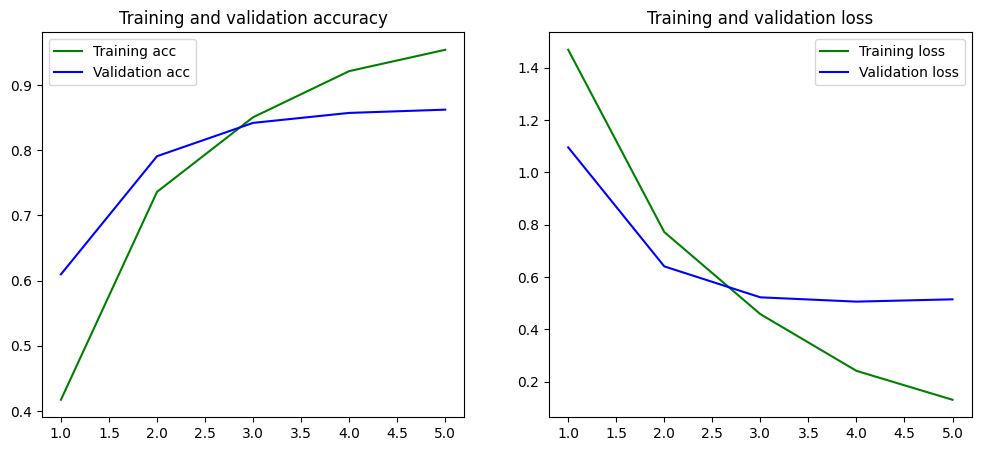

In [35]:
PlotGraph(history)